In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
store = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/m_store.csv')
area = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/m_area.csv')
order4 = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/tbl_order_202104.csv')
order5 = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/tbl_order_202105.csv')
order6 = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/머신러닝/챕터1/tbl_order_202106.csv')

In [18]:
from IPython.display import display, clear_output
from ipywidgets import Dropdown

order_data = pd.merge(order4,store,on='store_id',how='left')
order_data = pd.merge(order_data,area,on='area_cd',how='left')

order_data.loc[order_data['takeout_flag']==0,'takeout_name']='delivery'
order_data.loc[order_data['takeout_flag']==1,'takeout_name']='takeout'

order_data.loc[order_data['status']==0,'status_name'] = '주문 접수'
order_data.loc[order_data['status']==1,'status_name'] = '결제 완료'
order_data.loc[order_data['status']==2,'status_name'] = '배달 완료'
order_data.loc[order_data['status']==9,'status_name'] = '주문 취소'

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name']==val['new'])&
                               (order_data['status'].isin([1,2]))]
    display(pick_data.head())

store_list = store['store_name'].tolist()

dropdown = Dropdown(options=store_list,description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(description='지역 선택:', options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '…

Dropdown(index=17, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내…

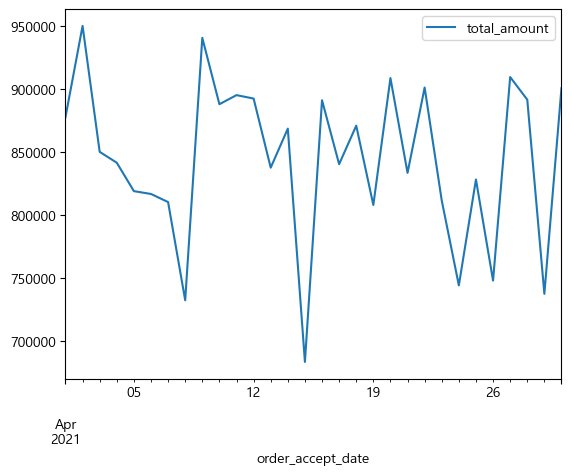

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
if os.name == 'nt':
    plt.rc('font',family='Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font',family = 'AllieGothic')

plt.rcParams['axes.unicode_minus'] = False

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name']==val['new'])&
                               (order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date','total_amount']].copy()
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date',inplace=True)
    temp.resample('D').sum().plot()
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store,names='value')
display(dropdown2)